In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import gudhi

from TopoMap import TopoMap
from TopoMapCut import TopoMapCut, TopoMapCutInv

2024-03-13 16:14:18.875927: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 16:14:18.911060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 16:14:18.911090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 16:14:18.912202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 16:14:18.917286: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 16:14:18.917960: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def plot_data_projection(df, proj_topomap, proj_cut):

    fig = make_subplots(rows=1, cols=3,
                        specs=[[{'type': 'scene'}, 
                                {'type': 'xy'},
                                {'type': 'xy'}]],
                        subplot_titles=('Original clusters',
                                        'TopoMap Projection', 
                                        'New Projection'))

    fig.add_trace(
        go.Scatter3d(x=df['x'], y=df['y'], z=df['z'],
                     mode='markers',
                     marker=dict(size=3,
                                 color=df['ClusterId'],
                                 colorscale=px.colors.qualitative.D3),
                     ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=proj_topomap[:,0], 
                   y=proj_topomap[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=proj_cut[:,0], 
                   y=proj_cut[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=3
    )

    fig.update_layout(showlegend=False,
                      height=500,
                      width=1200)

    return fig

In [3]:
def plot_data_projection_inv(df, proj_topomap, proj_cut, comp_centers=None):

    fig = make_subplots(rows=1, cols=3,
                        specs=[[{'type': 'scene'}, 
                                {'type': 'xy'},
                                {'type': 'xy'}]],
                        subplot_titles=('Original clusters',
                                        'TopoMap Projection', 
                                        'New Projection'))

    fig.add_trace(
        go.Scatter3d(x=df['x'], y=df['y'], z=df['z'],
                     mode='markers',
                     marker=dict(size=3,
                                 color=df['ClusterId'],
                                 colorscale=px.colors.qualitative.D3),
                     ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=proj_topomap[:,0], 
                   y=proj_topomap[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=proj_cut[:,0], 
                   y=proj_cut[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=3
    )

    if not comp_centers is None:
        fig.add_trace(
        go.Scatter(x=comp_centers[:,0], 
                   y=comp_centers[:,1],
                   mode='markers'
                   ),
        row=1, col=3
    )

    fig.update_layout(showlegend=False,
                      height=500,
                      width=1200)

    return fig

## 3 Blobs Dataset

In [4]:
df_blobs = pd.read_csv('data/3blobs.csv')
data_blobs = df_blobs[['x','y','z']].values
proj_original_blobs = np.genfromtxt('data/3blobs_output.csv', delimiter=',')

In [5]:
topocut_blobs = TopoMapCut(data_blobs,
                           max_components=20,
                           ignore_outliers=False)
projections = topocut_blobs.run()
print(f'Number of components: {len(topocut_blobs.subsets)}')

[INFO] Max components hit. # components: 20 | Max_components: 20
Number of components: 20


In [6]:
topomap_blobs = TopoMap(data_blobs)
proj_blobs = topomap_blobs.run()

In [7]:
df_blobs['component'] = 0

for i in range(len(data_blobs)):
    for j in range(len(topocut_blobs.subsets)):
        if i in topocut_blobs.subsets[j]:
            df_blobs.loc[i,'component'] = j

In [8]:
fig = plot_data_projection(df_blobs, proj_blobs, projections)
fig.update_layout(title_text='3 Blobs Dataset')
fig.show()

In [9]:
topocut_inv_blobs = TopoMapCutInv(data_blobs,
                                    max_components=50)
projections_inv = topocut_inv_blobs.run()
print(f'Number of components: {len(topocut_inv_blobs.subsets)}')

[INFO] Max components hit. # components: 50 | Max_components: 50
Number of components: 50


In [10]:
fig = plot_data_projection(df_blobs, proj_blobs, projections_inv)
fig.update_layout(title_text='3 Blobs Dataset - Inverted Projection')
fig.show()

## 3 Rings Dataset

In [11]:
df_rings = pd.read_csv('data/3rings.csv')
data_rings = df_rings[['x','y','z']].values
proj_original_rings = np.genfromtxt('data/3rings_output.csv', delimiter=',')

In [12]:
topocut_rings = TopoMapCut(data_rings,
                           max_components=30,
                           ignore_outliers=False)
projections = topocut_rings.run()
print(f'Number of components: {len(topocut_rings.subsets)}')

[INFO] Max components hit. # components: 30 | Max_components: 30
Number of components: 30


In [13]:
topomap_rings = TopoMap(data_rings)
proj_rings = topomap_rings.run()

In [14]:
df_rings['component'] = 0

for i in range(len(df_rings)):
    for j in range(len(topocut_rings.subsets)):
        if i in topocut_rings.subsets[j]:
            df_rings.loc[i,'component'] = j

In [15]:
fig = plot_data_projection(df_rings, proj_rings, projections)
fig.update_layout(title_text='3 Rings Dataset')
fig.show()

In [16]:
topocut_inv_rings = TopoMapCutInv(data_rings,
                                    max_components=50)
projections_inv = topocut_inv_rings.run()
print(f'Number of components: {len(topocut_inv_rings.subsets)}')

[INFO] Max components hit. # components: 50 | Max_components: 50
Number of components: 50


In [17]:
fig = plot_data_projection(df_rings, proj_rings, projections_inv)
fig.update_layout(title_text='3 Rings Dataset')
fig.show()

## 2 Cavities Dataset

In [18]:
df_cavities = pd.read_csv('data/2cavities.csv')
df_cavities = df_cavities.rename(columns={'X':'x', 'Y':'y', 'Z':'z'})
data_cavities = df_cavities[['x','y','z']].values
proj_original_cavities = np.genfromtxt('data/2cavities_output.csv', delimiter=',')

In [19]:
topocut_cavities = TopoMapCut(data_cavities,
                              max_components=20,
                              ignore_outliers=False)
projections = topocut_cavities.run()
print(f'Number of components: {len(topocut_cavities.subsets)}')

[INFO] Max components hit. # components: 20 | Max_components: 20
Number of components: 20


In [20]:
topomap_cavities = TopoMap(data_cavities)
proj_cavities = topomap_cavities.run()

In [21]:
df_cavities['component'] = 0

for i in range(len(df_cavities)):
    for j in range(len(topocut_cavities.subsets)):
        if i in topocut_cavities.subsets[j]:
            df_cavities.loc[i,'component'] = j

In [22]:
fig = plot_data_projection(df_cavities, proj_cavities, projections)
fig.update_layout(title_text='2 Cavities Dataset')
fig.show()

In [54]:
topocut_inv_cav = TopoMapCutInv(data_cavities,
                                    max_components=100)
components = topocut_inv_cav.get_components(max_components=topocut_inv_cav.max_components,
                                            max_dist=topocut_inv_cav.max_dist)
proj_points_pre = topocut_inv_cav.projections.copy()
comp_centers = topocut_inv_cav.get_component_center()

proj_comp_center_pre = topocut_inv_cav.project_components_center(proj_method=topocut_inv_cav.proj_method).copy()

topocut_inv_cav.get_component_ranges()
proj_points = topocut_inv_cav.join_components()
proj_comp_center_pos = topocut_inv_cav.components_proj

[INFO] Max components hit. # components: 100 | Max_components: 100


Text(0.5, 1.0, '(D) Projections with centers')

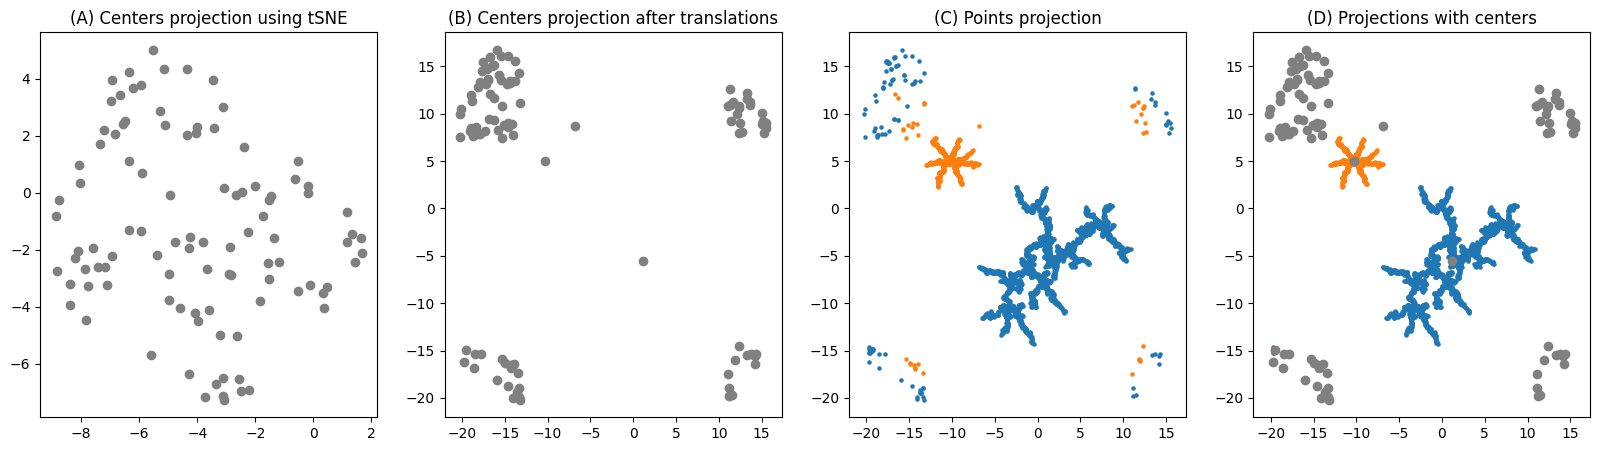

In [55]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))

axs[0].scatter(proj_comp_center_pre[:,0], proj_comp_center_pre[:,1], 
               c='gray')
axs[0].set_title('(A) Centers projection using tSNE')

axs[1].scatter(proj_comp_center_pos[:,0], proj_comp_center_pos[:,1],
               c='gray')
axs[1].set_title('(B) Centers projection after translations')

colors = ['tab:blue', 'tab:orange']
i = 0
for cluster in df_cavities['ClusterId'].unique():
    i_cluster = list(df_cavities[df_cavities['ClusterId']==cluster].index)
    axs[2].scatter(proj_points[i_cluster,0], proj_points[i_cluster,1],
            c=colors[i], s=5)
    i += 1
axs[2].set_title('(C) Points projection')

colors = ['tab:blue', 'tab:orange']
i = 0
for cluster in df_cavities['ClusterId'].unique():
    i_cluster = list(df_cavities[df_cavities['ClusterId']==cluster].index)
    axs[3].scatter(proj_points[i_cluster,0], proj_points[i_cluster,1],
            c=colors[i], s=5)
    i += 1
axs[3].scatter(proj_comp_center_pos[:,0], proj_comp_center_pos[:,1],
               c='gray')
axs[3].set_title('(D) Projections with centers')


In [25]:
topocut_inv_cav = TopoMapCutInv(data_cavities,
                                    max_components=50)
projections_inv = topocut_inv_cav.run()
print(f'Number of components: {len(topocut_inv_cav.subsets)}')

[INFO] Max components hit. # components: 50 | Max_components: 50
Number of components: 50


In [27]:
fig = plot_data_projection_inv(df_cavities, proj_cavities, projections_inv, topocut_inv_cav.components_proj)
fig.update_layout(title_text='2 Cavities Dataset')
fig.show()